In [1]:
import pandas as pd
from helper import calculate_len_and_time,sum_cols
import json

In [2]:
pd.set_option('max_colwidth',None)

In [3]:
sum_cols

['minute',
 'second',
 'teamId',
 'x',
 'y',
 'endX',
 'endY',
 'type_displayName',
 'outcomeType_displayName',
 'name',
 'qualifiers']

In [4]:
match_id = "110"

In [5]:
# read the file
with open(f'data/seq/{match_id}.json') as f:
    t_seq = [tuple(x) for x in json.load(f)]

In [6]:
length = []
for i in t_seq:
    length.append(i[1]-i[0])

In [7]:
from matplotlib import pyplot as plt


(array([16.,  3.,  9.,  8.,  2.,  0.,  3.,  0.,  0.,  1.]),
 array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ]),
 <BarContainer object of 10 artists>)

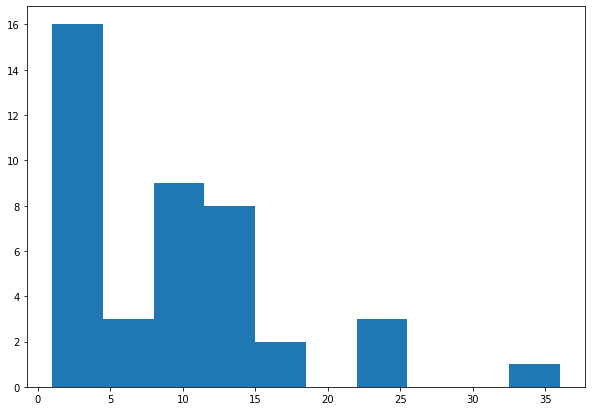

In [8]:
fig,ax = plt.subplots(figsize=(10,7))
ax.hist(length)

In [9]:
df_all = pd.read_csv(f"data/20_21/{match_id}.csv",low_memory=False)

pd.set_option('display.max_columns', None)

In [10]:
st_time = [x[0]*60+x[1] for x in df_all.iloc[[x[0] for x in t_seq]][['minute','second']].values]

In [11]:
end_time = [x[0]*60+x[1] for x in df_all.iloc[[x[1] for x in t_seq]][['minute','second']].values]

In [12]:
duration = []
for e,s in zip(end_time,st_time):
    duration.append(e-s)

(array([25.,  8.,  6.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2. ,  23.4,  44.8,  66.2,  87.6, 109. , 130.4, 151.8, 173.2,
        194.6, 216. ]),
 <BarContainer object of 10 artists>)

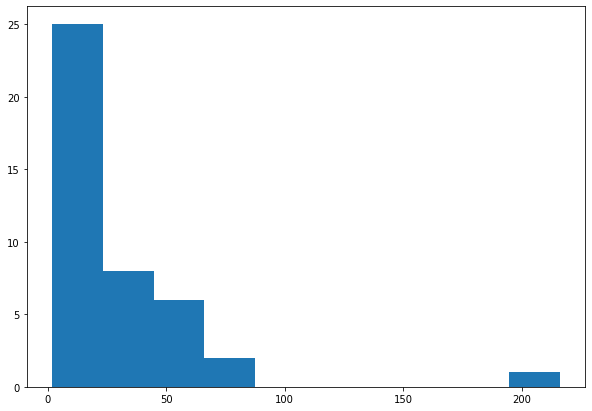

In [13]:
fig,ax = plt.subplots(figsize=(10,7))
ax.hist(duration)

In [22]:
i=1

In [23]:
df_all.iloc[t_seq[i][0]:t_seq[i][1]][sum_cols]

,minute,second,teamId,x,y,endX,endY,type_displayName,outcomeType_displayName,name,qualifiers
13,0,41.0,161,49.2,0.0,54.3,6.1,Pass,Successful,Nélson Semedo,"[{'type': {'value': 141, 'displayName': 'PassEndY'}, 'value': '6.1'}, {'type': {'value': 107, 'displayName': 'ThrowIn'}}, {'type': {'value': 213, 'displayName': 'Angle'}, 'value': '0.8'}, {'type': {'value': 212, 'displayName': 'Length'}, 'value': '7.6'}, {'type': {'value': 140, 'displayName': 'PassEndX'}, 'value': '54.3'}, {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Right'}]"
14,0,42.0,161,54.3,6.1,44.9,5.3,Pass,Unsuccessful,Pedro Neto,"[{'type': {'value': 21, 'displayName': 'OtherBodyPart'}}, {'type': {'value': 213, 'displayName': 'Angle'}, 'value': '3.2'}, {'type': {'value': 212, 'displayName': 'Length'}, 'value': '9.9'}, {'type': {'value': 141, 'displayName': 'PassEndY'}, 'value': '5.3'}, {'type': {'value': 140, 'displayName': 'PassEndX'}, 'value': '44.9'}, {'type': {'value': 178, 'displayName': 'StandingSave'}}, {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Back'}]"
15,0,43.0,24,58.5,95.7,NaN,NaN,Interception,Successful,Jack Grealish,"[{'type': {'value': 178, 'displayName': 'StandingSave'}}, {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Left'}]"
16,0,44.0,24,51.5,94.0,NaN,NaN,Challenge,Unsuccessful,John McGinn,"[{'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Left'}, {'type': {'value': 233, 'displayName': 'OppositeRelatedEvent'}, 'value': '13'}, {'type': {'value': 285, 'displayName': 'Defensive'}}]"
17,0,44.0,161,48.5,6.0,NaN,NaN,TakeOn,Successful,Nélson Semedo,"[{'type': {'value': 233, 'displayName': 'OppositeRelatedEvent'}, 'value': '10'}, {'type': {'value': 286, 'displayName': 'Offensive'}}, {'type': {'value': 178, 'displayName': 'StandingSave'}}, {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Back'}]"
18,0,45.0,161,46.0,9.5,NaN,NaN,BallTouch,Successful,Nélson Semedo,"[{'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Back'}, {'type': {'value': 178, 'displayName': 'StandingSave'}}]"
19,0,47.0,161,58.6,6.8,NaN,NaN,TakeOn,Successful,Pedro Neto,"[{'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Right'}, {'type': {'value': 233, 'displayName': 'OppositeRelatedEvent'}, 'value': '68'}, {'type': {'value': 286, 'displayName': 'Offensive'}}, {'type': {'value': 178, 'displayName': 'StandingSave'}}]"
20,0,47.0,24,41.4,93.2,NaN,NaN,Challenge,Unsuccessful,Douglas Luiz,"[{'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Back'}, {'type': {'value': 285, 'displayName': 'Defensive'}}, {'type': {'value': 233, 'displayName': 'OppositeRelatedEvent'}, 'value': '14'}]"
21,0,49.0,161,66.3,4.9,84.6,4.9,Pass,Successful,Pedro Neto,"[{'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Right'}, {'type': {'value': 213, 'displayName': 'Angle'}, 'value': '0'}, {'type': {'value': 140, 'displayName': 'PassEndX'}, 'value': '84.6'}, {'type': {'value': 141, 'displayName': 'PassEndY'}, 'value': '4.9'}, {'type': {'value': 212, 'displayName': 'Length'}, 'value': '19.2'}, {'type': {'value': 178, 'displayName': 'StandingSave'}}]"
22,0,54.0,161,92.3,7.0,93.0,48.5,Pass,Unsuccessful,Daniel Podence,"[{'type': {'value': 140, 'displayName': 'PassEndX'}, 'value': '93.0'}, {'type': {'value': 141, 'displayName': 'PassEndY'}, 'value': '48.5'}, {'type': {'value': 155, 'displayName': 'Chipped'}}, {'type': {'value': 20, 'displayName': 'RightFoot'}}, {'type': {'value': 212, 'displayName': 'Length'}, 'value': '28.2'}, {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Center'}, {'type': {'value': 213, 'displayName': 'Angle'}, 'value': '1.5'}, {'type': {'value': 178, 'displayName': 'StandingSave'}}, {'type': {'value': 2, 'displayName': 'Cross'}}]"


In [19]:
df_all.iloc[[27,13]]

,Unnamed: 0,Unnamed: 0.1,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,isTouch,period_value,period_displayName,type_value,type_displayName,outcomeType_value,outcomeType_displayName,playerId,endX,endY,relatedEventId,relatedPlayerId,goalMouthZ,goalMouthY,isShot,blockedX,blockedY,cardType_value,cardType_displayName,isGoal,name,position,shirtNo,isOwnGoal
27,176358,27,2.243454e+09,15,0,58.0,24,2.0,40.5,0,"[{'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Back'}, {'type': {'value': 233, 'displayName': 'OppositeRelatedEvent'}, 'value': '18'}, {'type': {'value': 73, 'displayName': 'MissLeft'}}]",[121],False,1,FirstHalf,6,CornerAwarded,0,Unsuccessful,109807.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bertrand Traoré,FWR,15.0,NaN
13,176344,13,2.243454e+09,10,0,41.0,161,49.2,0.0,0,"[{'type': {'value': 141, 'displayName': 'PassEndY'}, 'value': '6.1'}, {'type': {'value': 107, 'displayName': 'ThrowIn'}}, {'type': {'value': 213, 'displayName': 'Angle'}, 'value': '0.8'}, {'type': {'value': 212, 'displayName': 'Length'}, 'value': '7.6'}, {'type': {'value': 140, 'displayName': 'PassEndX'}, 'value': '54.3'}, {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Right'}]","[90, 211, 35, 36, 215]",True,1,FirstHalf,1,Pass,1,Successful,296363.0,54.3,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nélson Semedo,DR,22.0,NaN


In [37]:
t_seq

[(10, 13),
 (13, 27),
 (103, 107),
 (107, 111),
 (111, 128),
 (149, 157),
 (190, 203),
 (324, 335),
 (335, 347),
 (347, 353),
 (415, 424),
 (424, 433),
 (441, 442),
 (464, 468),
 (470, 473),
 (491, 504),
 (728, 736),
 (776, 812),
 (812, 815),
 (815, 823),
 (823, 826),
 (826, 832),
 (861, 865),
 (865, 877),
 (889, 913),
 (918, 926),
 (948, 953),
 (953, 965),
 (975, 978),
 (986, 995),
 (1022, 1026),
 (1035, 1046),
 (1046, 1069),
 (1157, 1169),
 (1169, 1170),
 (1188, 1189),
 (1198, 1202),
 (1240, 1253),
 (1274, 1277),
 (1277, 1281),
 (1307, 1332),
 (1407, 1422)]